# Legge dei punti coniugati

I dati sono presi da un'esperienza di laboratorio per la verifica della legge dei punti coniugati in ottica geometrica.

La legge è la seguente:

$\displaystyle \frac{1}{p} + \frac{1}{q} = \frac{1}{f}$

Nell'esperienza vengono misurati diversi valori di $p$ ed i corrispondenti $q$ con lo scopo di misurare $f$. Si calcolano quindi gli inversi di $p$ e $q$ e si propagani i corrispondenti errori.

Si eseque quindi una regressione lineare sulle variabili $x=1/p$ e $y=1/q$.

La presenza di errori, sia nella misura di $p$ (quindi di $x$) che di $q$ (quindi di $y$), non è in genere contemplata nelle procedure di regressione lineare.

Tuttavia, si può propagare l'errore su $x$ in base alla funzione di *fit* ed ottenere un contributo ulteriore all'errore su $y$. Il *fit* su può quindi iterare per ottenere una nuova stima, più accurata, con i suoi errori. La procedura iterativa si può ripetere fino ad ottenere un valore stabile dei parametri del fit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/lab_ottica_punti_coniugati.csv')

In [3]:
df

,p,q,dp,dq,Q,P,1/f,dQ,dP
0,32.0,57.5,0.5,0.5,0.017391,0.031250,0.048641,0.000151,0.000488
1,42.0,38.5,0.5,0.5,0.025974,0.023810,0.049784,0.000337,0.000283
2,52.5,33.0,0.5,0.5,0.030303,0.019048,0.049351,0.000459,0.000181
3,62.5,29.5,0.5,0.5,0.033898,0.016000,0.049898,0.000575,0.000128
4,71.5,28.0,0.5,0.5,0.035714,0.013986,0.049700,0.000638,0.000098
5,87.0,25.5,0.5,0.5,0.039216,0.011494,0.050710,0.000769,0.000066
6,95.0,25.0,0.5,0.5,0.040000,0.010526,0.050526,0.000800,0.000055
7,105.0,24.5,0.5,0.5,0.040816,0.009524,0.050340,0.000833,0.000045
8,119.0,23.5,0.5,0.5,0.042553,0.008403,0.050957,0.000905,0.000035
9,144.5,22.5,0.5,0.5,0.044444,0.006920,0.051365,0.000988,0.000024


Grafichiamo $p$ *vs* $q$. Va notato che a questo punto avremmo gli strumenti per fare un fit direttamente di questi dati secondo la legge:

$\displaystyle q(p) = \frac{1}{\displaystyle\frac{1}{f}-\frac{1}{p}}$

$f$ sarebbe il parametro da determinare nel fit.

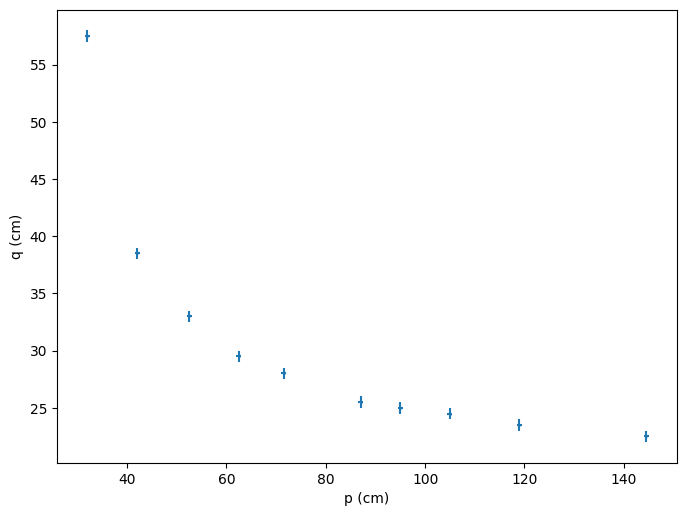

In [5]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.p, df.q, xerr=df.dp, yerr=df.dq, marker='o', markersize=1, linestyle='')
ax.set_xlabel('p (cm)')
ax.set_ylabel('q (cm)')
fig.show()

Implementiamo un *fit* di minimo chi-quadro

In [6]:
from scipy.optimize import curve_fit
import math
import numpy as np
def model(p, k, f):
    return k/(1/f - 1/p)
par, cov = curve_fit(model, df.p, df.q, p0=[1, 1])
print('k = {:.3f} ± {:.3f}'.format(par[0], math.sqrt(cov[0,0])))
print('f = {:.3f} ± {:.3f}'.format(par[1], math.sqrt(cov[1,1])))
print('cov(a,k) = {:.5f}'.format(cov[0,1]))

k = 0.918 ± 0.009
f = 21.167 ± 0.103
cov(a,k) = -0.00090


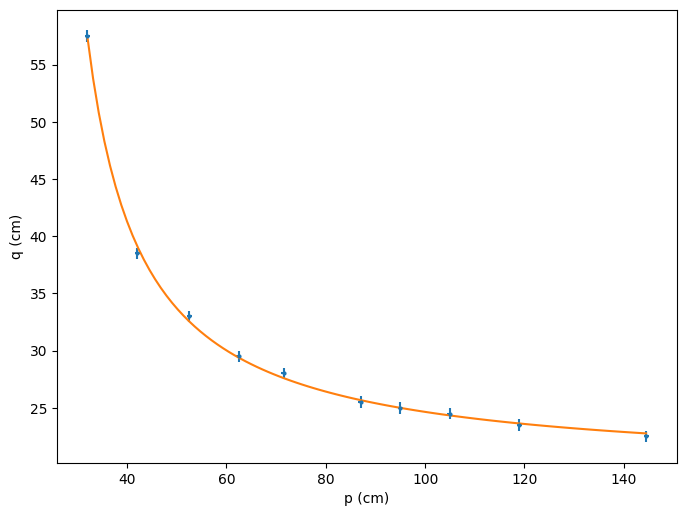

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.p, df.q, xerr=df.dp, yerr=df.dq, marker='o', markersize=2, linestyle='')
xs = np.linspace(df.p.values[0], df.p.values[-1], 100)
ax.plot(xs, model(xs, *par), label='fit line')
ax.set_xlabel('p (cm)')
ax.set_ylabel('q (cm)')
fig.show()

Passiamo quindi agli inversi, $1/p$ e $1/q$. Un fit lineare è sicuramente più semplice da implementare anche con strumenti software non troppo complessi.

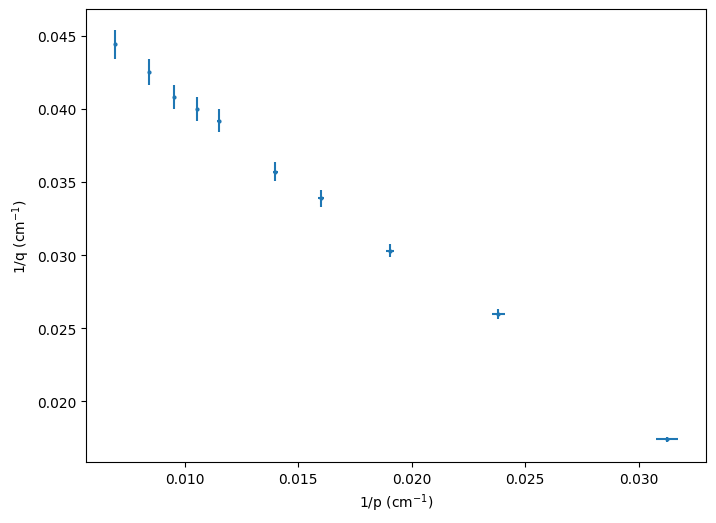

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.P, df.Q, xerr=df.dP, yerr=df.dQ, marker='o', markersize=2, linestyle='')
ax.set_xlabel('1/p (cm$^{-1}$)')
ax.set_ylabel('1/q (cm$^{-1}$)')
fig.show()

Procediamo con la regressione lineare che abbiamo già implementato in precedenza. Potremmo anche usare una funzione di qualche libreria python.

In [11]:
from scipy import stats
import math
import numpy as np

In [12]:
x, y = np.array(df.P.values), np.array(df.Q.values)
n_points = len(x)
err = np.array(df.dQ.values)
err2 = err**2
w = 1/err2
w /= w.sum()
x_mean = np.average(x, weights=w)
y_mean = np.average(y, weights=w)
dx = x - x_mean; dy = y - y_mean
dxdy = dx*dy*w; dx2 = dx*dx*w
dxdy_mean = dxdy.sum()
dx2_mean = dx2.sum()
b_fit = dxdy_mean/dx2_mean
a_fit = y_mean - b_fit*x_mean
def fit_line(x):
    return a_fit + x*b_fit

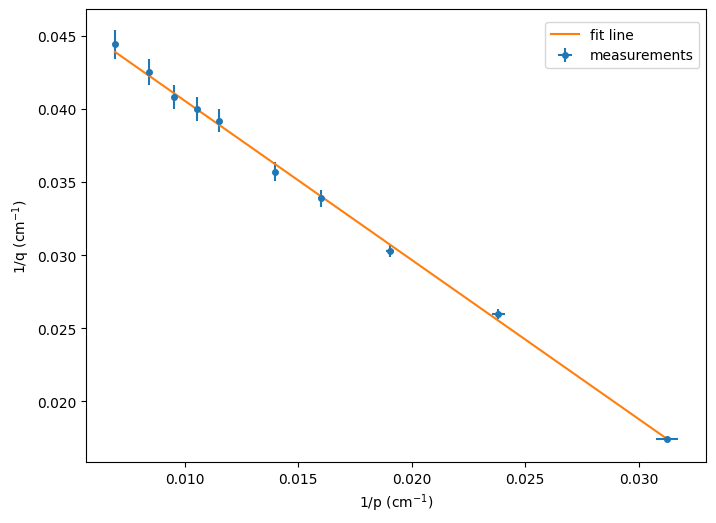

In [13]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.P, df.Q, xerr=df.dP, yerr=df.dQ, marker='o', markersize=4, linestyle='', label='measurements')
ax.plot(df.P, fit_line(df.P), label='fit line')
ax.set_xlabel('1/p ($\mathrm{cm}^{-1}$)')
ax.set_ylabel('1/q ($\mathrm{cm}^{-1}$)')
fig.legend(bbox_to_anchor=(0.9, 0.87))
fig.show()

Determiniamo i parametri del fit con i loro errori.

In [15]:
y_fit = a_fit + b_fit*x
res = y - y_fit
res2 = res**2
res2_mean = np.average(res2, weights=w)
x2_mean = np.average(x**2, weights=w)
chi_2 = (res2/err2).sum()
ndof = n_points-2
var_b = res2_mean/dx2_mean/(n_points-2)
var_a = var_b*x2_mean
cov_ab = -var_b*x_mean
err_b = math.sqrt(var_b)
err_a = math.sqrt(var_a)
print('b = {:.3f} ± {:.3f}'.format(b_fit, err_b))
print('a = {:.5f} ± {:.5f}'.format(a_fit, err_a))
print('cov(a,b) = {:.8f}'.format(cov_ab))
print('chi^2 = {:.3f}/{:d} ndof'.format(chi_2, ndof))
print('p = {:.3f}'.format(1 - stats.chi2.cdf(chi_2, ndof)))

b = -1.089 ± 0.011
a = 0.05145 ± 0.00030
cov(a,b) = -0.00000316
chi^2 = 3.886/8 ndof
p = 0.867


## Propagazione degli errori su $x$

Un modo per propagare gli errori su $x$ è di stimare, una volta ottenuto il fit, l'effetto su $y$, e sommare questo contributo all'errore su $y$:

$\displaystyle \delta y^\prime = \left|\frac{\mathrm{d}}{\mathrm{d}x}(a+bx)\right|\delta x = \left|b\right|\delta x$

$\displaystyle \delta y^{\mathrm{tot}} = \sqrt{\delta y^2 + b^2\delta x^2}$

Si può quindi rifare il fit, ed eventualmente procedere iterativamente fino che la procedura non converge.

<span style="color:red">Strettamente parlando, dovremmo anche propagare gli errori su $a$ e su $b$. Ma, se facessimo questo, gli errori sulle $y_i$ potranno avere un termine di correlazione tra di loro dovuto al termine di covarianza tra $a$ e $b$. Tenerne conto richiederebbe una ridefinizione del $\chi^2$ da minimizzare per ottenere le nuove stime di $a$ e di $b$. Ignoriamo questi errori per semplicità di calcolo, ma anche perché sono molto più piccoli degli errori su $x_i$ e $y_i$.</span>

Vedremo che in realtà bastano una o due iterazioni per far convergere il processo. In questo caso, i risultati cambiano pochissimo rispetto al fit originale. Ma non è detto che sia sempre così.

<span style="color:blue">Quando si aggiorna un fit fatto con una stima iniziale aggiungendo nuove informazioni, si parla di *refit*. Esistono diverse applicazioni, anche complesse, in cui questo può essere necessario. Ad esempio, in un rivelatore si può fare prima la ricostruzione delle tracce di alcune particelle. Quindi si calcolano fattori di calibrazione degli allineamenti relativi di diversi rivelatori. Si fa quindi il *refit* delle tracce ricostruite per tener conto del migiore allineamento e si ottengono in genere parametri delle tracce più accurati.</span>

In [16]:
print('--- initial values ---')
print('b = {:.3f} ± {:.3f}'.format(b_fit, err_b))
print('a = {:.5f} ± {:.5f}'.format(a_fit, err_a))
print('cov(a,b) = {:.8f}'.format(cov_ab))
print('chi^2 = {:.3f}/{:d} ndof'.format(chi_2, ndof))
print('p = {:.3f}'.format(1 - stats.chi2.cdf(chi_2, ndof)))
niter = 4
for i in range(niter):
    err = np.sqrt(np.array(df.dQ.values)**2+(b_fit*np.array(df.dP.values))**2)
    err2 = err**2
    w = 1/err2
    w /= w.sum()
    x_mean = np.average(x, weights=w)
    y_mean = np.average(y, weights=w)
    dx = x - x_mean; dy = y - y_mean
    dxdy = dx*dy*w; dx2 = dx*dx*w
    dxdy_mean = dxdy.sum()
    dx2_mean = dx2.sum()
    b_fit = dxdy_mean/dx2_mean
    a_fit = y_mean - b_fit*x_mean
    y_fit = a_fit + b_fit*x
    res = y - y_fit
    res2 = res**2
    res2_mean = np.average(res2, weights=w)
    x2_mean = np.average(x**2, weights=w)
    chi_2 = (res2/err2).sum()
    ndof = n_points-2
    var_b = res2_mean/dx2_mean/(n_points-2)
    var_a = var_b*x2_mean
    cov_ab = -var_b*x_mean
    err_b = math.sqrt(var_b)
    err_a = math.sqrt(var_a)
    print('--- iter: {:d} ---'.format(i))
    print('b = {:.3f} ± {:.3f}'.format(b_fit, err_b))
    print('a = {:.5f} ± {:.5f}'.format(a_fit, err_a))
    print('cov(a,b) = {:.8f}'.format(cov_ab))
    print('chi^2 = {:.3f}/{:d} ndof'.format(chi_2, ndof))
    print('p = {:.3f}'.format(1 - stats.chi2.cdf(chi_2, ndof)))


--- initial values ---
b = -1.089 ± 0.011
a = 0.05145 ± 0.00030
cov(a,b) = -0.00000316
chi^2 = 3.886/8 ndof
p = 0.867
--- iter: 0 ---
b = -1.084 ± 0.017
a = 0.05136 ± 0.00033
cov(a,b) = -0.00000502
chi^2 = 2.862/8 ndof
p = 0.943
--- iter: 1 ---
b = -1.084 ± 0.017
a = 0.05136 ± 0.00032
cov(a,b) = -0.00000502
chi^2 = 2.867/8 ndof
p = 0.942
--- iter: 2 ---
b = -1.084 ± 0.017
a = 0.05136 ± 0.00032
cov(a,b) = -0.00000502
chi^2 = 2.867/8 ndof
p = 0.942
--- iter: 3 ---
b = -1.084 ± 0.017
a = 0.05136 ± 0.00032
cov(a,b) = -0.00000502
chi^2 = 2.867/8 ndof
p = 0.942


 È possibile iterare la procedura fino a che la stima converga ad un valore stabile.
 In questo esempio, la modifica dovuta agli errori sulle misure $x_i$ è abbastanza piccola.